In [3]:
import numpy as np
import scipy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
def genData(means,var1,var2,corr):
    covar12 = corr*var1*var2
    cov  = [[np.square(var1),covar12],[covar12,np.square(var2)]]

    np.random.seed(42)
    X = np.random.multivariate_normal(means, cov, N)

    pca = PCA(n_components=2)
    pca.fit(X)
    PCA(n_components=2)
    m    = np.around(pca.mean_,2)
    var  = np.around(pca.explained_variance_,2)
    comp = np.around(pca.components_,2)
    
    return X, m, var, comp

X-Means:     [-0.03  1.5 ]
X-VarSqrts:  [2.05912603 0.59160798]
X-comps:     [[ 0.37  0.93]
 [-0.93  0.37]]
X-correlation:  0.7413039794175387

Z-Means:     [-0. -0.]
Z-VarSqrts:  [2.06155281 0.59160798]
Z-comps:     [[ 1.   -0.01]
 [ 0.01  1.  ]]
Z-correlation:  -0.016451728682295084


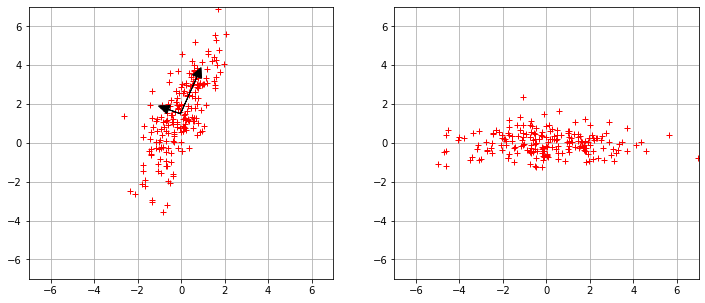

In [5]:
N = 200
L = 7

X, m, var, comp = genData([0,1.5],1,2,0.75)
print('X-Means:    ',m)
print('X-VarSqrts: ',np.sqrt(var))
print('X-comps:    ',comp)
print('X-correlation: ', scipy.stats.pearsonr(X.T[0],X.T[1])[0])

#principal components
Z = np.array([np.sum((X-m)*comp[0],axis=1),np.sum((X-m)*comp[1],axis=1)]).T

pca = PCA(n_components=2)
pca.fit(Z)
print()
print('Z-Means:    ',np.around(pca.mean_,2))
print('Z-VarSqrts: ',np.sqrt(np.around(pca.explained_variance_,2)))
print('Z-comps:    ',np.around(pca.components_,2))
print('Z-correlation: ', scipy.stats.pearsonr(Z.T[0],Z.T[1])[0])


fig = plt.figure(figsize = (12,5))
ax1 = plt.subplot(1,2,1)
ax1.plot(X.T[0],X.T[1],'r+')
ax1.set_xlim(-L,L)
ax1.set_ylim(-L,L)
ax1.grid(True)
ax1.arrow(m[0], m[1], np.sqrt(var[0])*comp[0,0], np.sqrt(var[0])*comp[0,1], head_width=0.45, head_length=0.5, fc='k', ec='k', zorder=2.5)
ax1.arrow(m[0], m[1], np.sqrt(var[1])*comp[1,0], np.sqrt(var[1])*comp[1,1], head_width=0.45, head_length=0.5, fc='k', ec='k', zorder=2.5)
ax2 = plt.subplot(1,2,2)
ax2.plot(Z.T[0],Z.T[1],'r+')
ax2.set_xlim(-L,L)
ax2.set_ylim(-L,L)
ax2.grid(True)

In [6]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

8


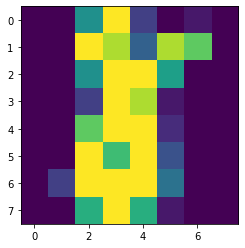

In [7]:
n=-8
plt.imshow(digits.images[n])
print(digits.target[n])

In [8]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data[:-10], digits.target[:-10])

clf.predict(digits.data[-10:])

array([5, 4, 8, 8, 4, 9, 0, 8, 9, 8])

In [9]:
A=np.array([[-0.2,1],[-1.1,0.5]])
U,S,V = np.linalg.svd(A)
print(A)
print('vs')
print(np.matmul(U,np.matmul(np.diag(S),V)))
print('vs')
print(np.sum([S[k]*np.outer(U[:,k],V[:,k]) for k in [0,1]], axis=0))

[[-0.2  1. ]
 [-1.1  0.5]]
vs
[[-0.2  1. ]
 [-1.1  0.5]]
vs
[[-0.2  1. ]
 [-1.1  0.5]]


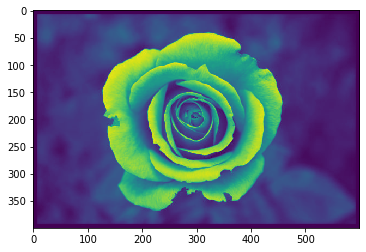

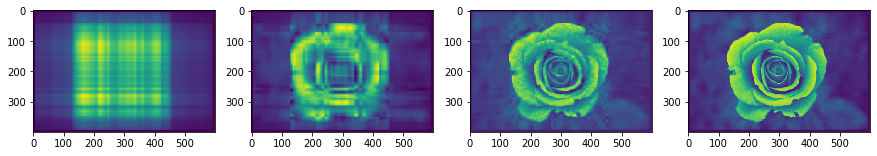

In [10]:
from PIL import Image
im = Image.open('data/rose01.jpg')
A = np.asarray(im)[:,:,2]
plt.imshow(A)
U,S,V = np.linalg.svd(A)
fig, ax_lst = plt.subplots(1, 4,figsize=(15,5))
for n,k in enumerate([1,5,20,50]):
    S2 = np.pad(S[:k], (0, len(S)-k), 'constant', constant_values=(0, 0))
    A2 = np.matmul(U,np.matmul(np.diag(S2),V[:400,:]))
    ax_lst[n].imshow(A2)

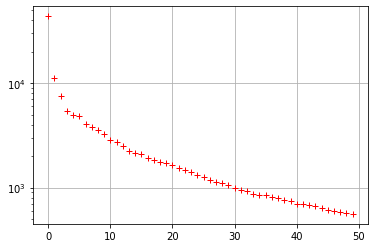

In [11]:
plt.semilogy(S[:50],'r+')
plt.grid(True)